###Name: Aditya D. Giradkar
###Class: TY_CS_B
###Gr. No.: 11810629
###ROll No: 10
###Assignment: KNN Algorithm

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
# seprating input(X) and output(Y)

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = x_train, x_test, y_train, y_test
print(x_train)

print(y_train)

print(x_test)

print(y_test)

[[    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  80000]
 [    46 117000]
 [    35  61000]
 [    21  68000]
 [    28  44000]
 [    41  87000]
 [    37  33000]
 [    27  90000]
 [    39  42000]
 [    28 123000]
 [    31 118000]
 [    25  87000]
 [    35  71000]
 [    37  70000]
 [    35  39000]
 [    47  23000]
 [    35 147000]
 [    48 138000]
 [    26  86000]
 [    25  79000]
 [    52 13800

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

print(x_train)

print(x_test)

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.12125343]
 

In [ ]:
train_data = np.column_stack((x_train, y_train))
test_data = np.column_stack((x_test, y_test))

In [ ]:
#euclidian distance
def euclidean_diatance(test_data, train_data):
  distance = 0
  for i in range(len(test_data) - 1):
    distance += (test_data[i]-train_data[i])**2

  distance = distance ** (0.5)

  return distance

In [ ]:
# actual algorithm
def KNN_algo(train_data, test_data, k_value):
  result = []
  for k in range(len(test_data)):
    all_eucli_dist = []
    for i in range(len(train_data)):
      eucledian_distance = euclidean_diatance(test_data[k], train_data[i]) 
      # eucledian_distance = (((x_train[i][0]-x_test[k][0])**2) + ((x_train[i][1]-x_test[k][1])**2))**0.5
      all_eucli_dist.append(eucledian_distance)

    #argsort sort the passed array and return index od sorting and :k cut the total array into kvalue
    sort_index = np.argsort(all_eucli_dist)
    sort_index = sort_index[:k_value]

    # print(sort_index)
    #find how many number of 0's and 1's present 
    no_of_0 = 0
    no_of_1 = 0
    for index in sort_index:
      if (train_data[index][2] == 1):
        no_of_1 += 1
      elif(train_data[index][2] == 0):
        no_of_0 += 1

    # check for max number
    if(no_of_1 > no_of_0):
      result.append([1, test_data[k][2]])
    else:
      result.append([0, test_data[k][2]])
      
  return result


In [ ]:
# confusion matrix calculation
def confusion_matrix_calculation(predicted_actual_result):
  confusion_matrix = []
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for result in result_predicted_actual:
    if(result[0] == 0 and result[1] == 0):
      TN = TN + 1
    elif(result[0] == 1 and result[1] == 1):
      TP = TP + 1
    elif(result[0] == 0 and result[1] == 1):
      FN = FN + 1
    elif(result[0] == 1 and result[1] == 0):
      FP = FP + 1
  confusion_matrix.append([TN, FP])
  confusion_matrix.append([FN, TP])

  return confusion_matrix


In [ ]:
# accuracy calculation
def accuracy(predicted_actual_result):
  match = 0
  length = len(predicted_actual_result)
  for result in result_predicted_actual:
    if(result[0] == result[1]):
      match = match + 1

  return (match/length)

In [ ]:
result_predicted_actual = KNN_algo(train_data, test_data, 3)
print(result_predicted_actual)

[[0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [1, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [1, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [1, 1.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 1.0], [1, 1.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [1, 1.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 0.0], [1, 1.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [1, 1.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 0.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 1.0], [0, 0.0], [1, 1.0], [1, 1.0], [0, 0.0], [0, 0.0], [1, 1.0], [0, 0.0], [0, 0.0], [0, 0.0], [0, 1.0], [0, 0.0], [1, 1.0], [1, 1.0], [1, 1.0],

In [ ]:
print("Confusion matrix and Accuracy of KNN from scratch modal : ")
print("Confusion Matrix : ",confusion_matrix_calculation(result_predicted_actual))

print("Accuracy : ", accuracy(result_predicted_actual))

Confusion matrix and Accuracy of KNN from scratch modal : 
Confusion Matrix :  [[73, 6], [5, 36]]
Accuracy :  0.9083333333333333


####Implementing The KNN algorithm using Sklearn package with same dataset

In [ ]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
# Training the K-NN model on the Training set

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predicting a new result

print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]]


In [ ]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)

[[73  6]
 [ 5 36]]


0.9083333333333333

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


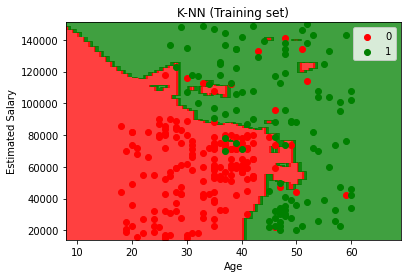

In [ ]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_train), y_train

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),

np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


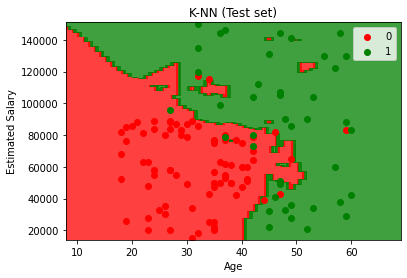

In [ ]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_test), y_test

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),

np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Test set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()